# 作业第三周（1）MLP模型练习

#### 1.仿照课件关于mnist数据集的分类训练，设计一个简单多层感知机网络，训练fashion_mnist的分类操作。
    (打印loss变化曲线曲线，显示测试集最后的预测准确率、混淆矩阵)

In [1]:
#首先执行GPU资源分配代码，勿删除。
import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
# train & test
from keras.datasets import fashion_mnist
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = fashion_mnist.load_data()
x_train_raw.shape

(60000, 28, 28)

In [3]:
# normalize and one-hot
from keras.utils import np_utils
x_train = x_train_raw.reshape(60000, 784).astype("float32") / 255
x_test = x_test_raw.reshape(10000, 784).astype("float32") / 255
y_train = np_utils.to_categorical(y_train_raw, 10)
y_test = np_utils.to_categorical(y_test_raw, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [4]:
# model
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_initializer="normal"))
model.add(Dense(512, activation='relu', kernel_initializer="normal"))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [5]:
# train
history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=0, validation_split=0.2)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-_to26unm because the default path (/home/student/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


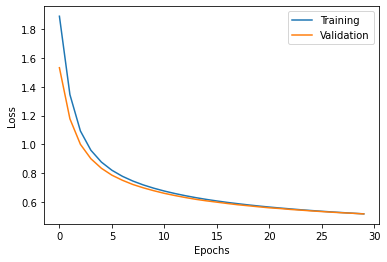

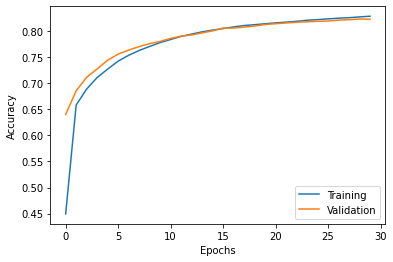

In [6]:
# visualize
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

# history.history.keys()
plot_history(history)

In [7]:
# test
scores = model.evaluate(x_test, y_test)
scores

313/313 [==============================] - 1s 2ms/step - loss: 0.5409 - accuracy: 0.8149


[0.5408555865287781, 0.8148999810218811]

In [8]:
# predict
prediction = model.predict_classes(x_test)
prediction

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1, ..., 8, 1, 7])

In [9]:
# convert label_id to label_text
def get_fashion_mnist_labels(label_id):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return text_labels[label_id]

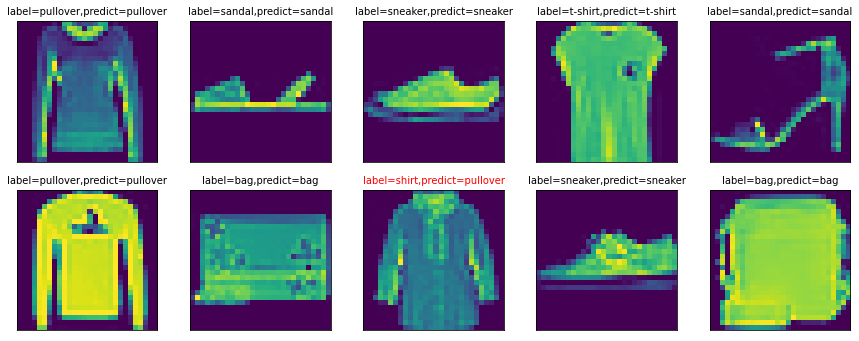

In [10]:
# if mismatch, labels will be shown in red
import matplotlib.pyplot as plt
%matplotlib inline
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(15, 15)
    fig.tight_layout()
    if num > 25:
        num = 25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx])
        title = "label=" + get_fashion_mnist_labels(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + get_fashion_mnist_labels(prediction[idx])
        if labels[idx] != prediction[idx]:
            color = "red"
        else: 
            color = "black"
        ax.set_title(title, fontsize=10, color=color)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

plot_images_labels_prediction(x_test_raw, y_test_raw, prediction, idx=110)

In [11]:
import pandas as pd
pd.crosstab(y_test_raw, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,783,9,15,61,7,4,103,0,18,0
1,5,937,14,34,6,0,2,0,2,0
2,17,3,695,11,166,1,91,0,16,0
3,33,16,10,844,40,0,53,0,4,0
4,1,3,93,32,767,1,97,0,6,0
5,0,0,0,2,0,886,0,72,5,35
6,162,4,131,53,128,3,484,0,35,0
7,0,0,0,0,0,32,0,893,0,75
8,1,2,13,9,4,9,22,10,929,1
